# Metropolis-Hastings Algorithm

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def target_dist(x):
    return sts.norm(-4,0.5**2).pdf(x)+sts.norm(4,1**2).pdf(x)

In [8]:
def proposal_dist(x,x0,para):
    return sts.norm(x0,para**2).pdf(x)

def proposal_rvs(x0,para):
    return sts.norm.rvs(x0,para**2)

In [12]:
proposal_rvs(1,1)

-0.6922973337171365

In [22]:
def metropolis_hastings(steps, para):
    # pick initial point
    samples = [sts.uniform.rvs(-6,8)] 
    for i in range(steps):
        x_t = samples[-1]
        x_star = proposal_rvs(x_t,para)
        acceptance = target_dist(x_star)/target_dist(x_t)*proposal_dist(x_t,x_star,para)/proposal_dist(x_star,x_t,para)
        if np.random.random()<=min(1,acceptance):
            #accept
            samples.append(x_star)
        else:
            samples.append(x_t)
    return samples

In [29]:
sample05 = metropolis_hastings(1000,0.5)
sample1 = metropolis_hastings(1000,1)
sample2 = metropolis_hastings(1000,2)
sample4 = metropolis_hastings(1000,4)


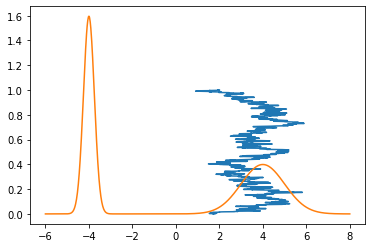

In [34]:
x = np.linspace(-6,8,1000)
plt.plot(sample05,np.linspace(0,1,1001))
plt.scatter([()])
plt.plot(x,target_dist(x))
plt.show()

In [ ]:
x = np.linspace(-6,8,1000)
plt.plot(sample05,np.linspace(0,1,1001))
plt.plot(x,target_dist(x))
plt.show()

In [26]:
def plot_acf(x):
    '''
    Plot the autocorrelation function for a series x. This corresponds to the
    acf() function in R. The series x is detrended by subtracting the mean of
    the series before computing the autocorrelation.
    The autocorrelation at lag = 0 is always 1 since the series is perfectly
    correlated with itself. You can ignore this value. The autocorrelation at
    all other values should be as small as possible, since independent samples
    have no correlation.
    '''
    from scipy import signal
    import matplotlib.pyplot as plt
    plt.acorr(
    x, maxlags=20, detrend=lambda x: signal.detrend(x, type='constant'))

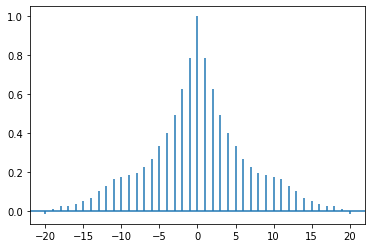

In [27]:
plot_acf(sample05)